In [1]:
import anndata as ad
import networkx as nx
import scanpy as sc
import scglue
from itertools import chain
from matplotlib import rcParams
import pandas as pd

import os
print(os.getcwd())

/Users/meiqiliu/PycharmProjects/GLUE3/evaluation/workflow/scripts


In [2]:
rna = ad.read_h5ad("rna-pp-seq.h5ad")
atac = ad.read_h5ad("atac-pp-seq.h5ad")
guidance = nx.read_graphml("guidance-seq.graphml.gz")
# rna = ad.read_h5ad("rna-pp2.h5ad")
# atac = ad.read_h5ad("atac-pp2.h5ad")
# guidance = nx.read_graphml("guidance2.graphml.gz")
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

scglue.models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep="X_lsi"
)
guidance_hvf = guidance.subgraph(chain(
    rna.var.query("highly_variable").index,
    atac.var.query("highly_variable").index
)).copy()

glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "atac": atac}, guidance_hvf,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using CPU as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 330
[INFO] SCGLUEModel: Setting `max_epochs` = 1707
[INFO] SCGLUEModel: Setting `patience` = 143
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 72
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.297, 'g_kl': 0.066, 'g_elbo': 0.363, 'x_rna_nll': 0.259, 'x_rna_kl': 0.027, 'x_rna_elbo': 0.286, 'x_atac_nll': 0.035, 'x_atac_kl': 0.012, 'x_atac_elbo': 0.048, 'dsc_loss': 0.445, 'vae_loss': 0.348, 'gen_loss': 0.326}, val={'g_nll': 0.318, 'g_kl': 0.068, 'g_elbo': 0.386, 'x_rna_nll': 0.254, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.279, 'x_atac_nll': 0.041, 'x_atac_kl': 0.007, 'x_atac_elbo': 0.048, 'dsc

[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.145, 'g_kl': 0.157, 'g_elbo': 0.302, 'x_rna_nll': 0.207, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.029, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.033, 'dsc_loss': 0.68, 'vae_loss': 0.258, 'gen_loss': 0.224}, val={'g_nll': 0.158, 'g_kl': 0.157, 'g_elbo': 0.315, 'x_rna_nll': 0.201, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.206, 'x_atac_nll': 0.033, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.036, 'dsc_loss': 0.67, 'vae_loss': 0.255, 'gen_loss': 0.221}, 0.4s elapsed
[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.147, 'g_kl': 0.157, 'g_elbo': 0.304, 'x_rna_nll': 0.207, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.028, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.032, 'dsc_loss': 0.681, 'vae_loss': 0.257, 'gen_loss': 0.223}, val={'g_nll': 0.118, 'g_kl': 0.157, 'g_elbo': 0.275, 'x_rna_nll': 0.203, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.209, 'x_atac_nll': 0.034, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.037, 'dsc_loss': 0.663, 'vae_loss': 0.257, '

[INFO] SCGLUETrainer: [Epoch 320] train={'g_nll': 0.128, 'g_kl': 0.159, 'g_elbo': 0.286, 'x_rna_nll': 0.208, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.215, 'x_atac_nll': 0.027, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.031, 'dsc_loss': 0.679, 'vae_loss': 0.257, 'gen_loss': 0.223}, val={'g_nll': 0.124, 'g_kl': 0.159, 'g_elbo': 0.282, 'x_rna_nll': 0.208, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.214, 'x_atac_nll': 0.036, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.038, 'dsc_loss': 0.666, 'vae_loss': 0.263, 'gen_loss': 0.23}, 0.4s elapsed
[INFO] SCGLUETrainer: [Epoch 330] train={'g_nll': 0.131, 'g_kl': 0.159, 'g_elbo': 0.29, 'x_rna_nll': 0.207, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.214, 'x_atac_nll': 0.028, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.032, 'dsc_loss': 0.681, 'vae_loss': 0.257, 'gen_loss': 0.223}, val={'g_nll': 0.167, 'g_kl': 0.159, 'g_elbo': 0.326, 'x_rna_nll': 0.198, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.204, 'x_atac_nll': 0.039, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.041, 'dsc_loss': 0.671, 'vae_loss': 0.257, '

2023-10-07 12:54:43,010 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "222"...
[INFO] EarlyStopping: Restoring checkpoint "222"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (15, 14)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 330
[INFO] SCGLUEModel: Setting `align_burnin` = 285
[INFO] SCGLUEModel: Setting `max_epochs` = 1707
[INFO] SCGLUEModel: Setting `patience` = 143
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 72
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.15, 'g_kl': 0.152, 'g_elbo': 0.302, 'x_rna_nll': 0.206, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.212, 'x_atac_nll': 0.03, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.033, 'dsc_loss': 0.677, 'vae_loss': 0.256, 'gen_loss': 0.2

[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.14, 'g_kl': 0.124, 'g_elbo': 0.264, 'x_rna_nll': 0.203, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.209, 'x_atac_nll': 0.028, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.032, 'dsc_loss': 0.689, 'vae_loss': 0.251, 'gen_loss': 0.217}, val={'g_nll': 0.14, 'g_kl': 0.123, 'g_elbo': 0.264, 'x_rna_nll': 0.213, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.22, 'x_atac_nll': 0.028, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.03, 'dsc_loss': 0.628, 'vae_loss': 0.26, 'gen_loss': 0.228}, 0.4s elapsed
[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.126, 'g_kl': 0.12, 'g_elbo': 0.246, 'x_rna_nll': 0.202, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.208, 'x_atac_nll': 0.027, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.03, 'dsc_loss': 0.689, 'vae_loss': 0.249, 'gen_loss': 0.214}, val={'g_nll': 0.146, 'g_kl': 0.119, 'g_elbo': 0.265, 'x_rna_nll': 0.21, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.216, 'x_atac_nll': 0.032, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.033, 'dsc_loss': 0.668, 'vae_loss': 0.26, 'gen_los

[INFO] SCGLUETrainer: [Epoch 320] train={'g_nll': 0.137, 'g_kl': 0.092, 'g_elbo': 0.229, 'x_rna_nll': 0.201, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.207, 'x_atac_nll': 0.027, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.031, 'dsc_loss': 0.682, 'vae_loss': 0.247, 'gen_loss': 0.213}, val={'g_nll': 0.134, 'g_kl': 0.092, 'g_elbo': 0.227, 'x_rna_nll': 0.211, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.216, 'x_atac_nll': 0.039, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.04, 'dsc_loss': 0.642, 'vae_loss': 0.265, 'gen_loss': 0.233}, 0.4s elapsed
[INFO] SCGLUETrainer: [Epoch 330] train={'g_nll': 0.148, 'g_kl': 0.092, 'g_elbo': 0.24, 'x_rna_nll': 0.2, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.206, 'x_atac_nll': 0.028, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.031, 'dsc_loss': 0.693, 'vae_loss': 0.247, 'gen_loss': 0.212}, val={'g_nll': 0.16, 'g_kl': 0.091, 'g_elbo': 0.251, 'x_rna_nll': 0.207, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.039, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.04, 'dsc_loss': 0.638, 'vae_loss': 0.263, 'gen_

[INFO] SCGLUETrainer: [Epoch 480] train={'g_nll': 0.158, 'g_kl': 0.083, 'g_elbo': 0.241, 'x_rna_nll': 0.201, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.206, 'x_atac_nll': 0.027, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.031, 'dsc_loss': 0.694, 'vae_loss': 0.247, 'gen_loss': 0.212}, val={'g_nll': 0.135, 'g_kl': 0.083, 'g_elbo': 0.217, 'x_rna_nll': 0.216, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.221, 'x_atac_nll': 0.037, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.038, 'dsc_loss': 0.674, 'vae_loss': 0.267, 'gen_loss': 0.234}, 0.4s elapsed
[INFO] SCGLUETrainer: [Epoch 490] train={'g_nll': 0.131, 'g_kl': 0.083, 'g_elbo': 0.214, 'x_rna_nll': 0.202, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.207, 'x_atac_nll': 0.027, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.031, 'dsc_loss': 0.688, 'vae_loss': 0.247, 'gen_loss': 0.212}, val={'g_nll': 0.154, 'g_kl': 0.083, 'g_elbo': 0.236, 'x_rna_nll': 0.21, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.215, 'x_atac_nll': 0.037, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.038, 'dsc_loss': 0.627, 'vae_loss': 0.263, 

[INFO] SCGLUETrainer: [Epoch 640] train={'g_nll': 0.147, 'g_kl': 0.083, 'g_elbo': 0.23, 'x_rna_nll': 0.2, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.205, 'x_atac_nll': 0.027, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.031, 'dsc_loss': 0.698, 'vae_loss': 0.245, 'gen_loss': 0.21}, val={'g_nll': 0.115, 'g_kl': 0.083, 'g_elbo': 0.198, 'x_rna_nll': 0.213, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.218, 'x_atac_nll': 0.039, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.04, 'dsc_loss': 0.638, 'vae_loss': 0.266, 'gen_loss': 0.234}, 0.4s elapsed
[INFO] SCGLUETrainer: [Epoch 650] train={'g_nll': 0.137, 'g_kl': 0.083, 'g_elbo': 0.219, 'x_rna_nll': 0.202, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.207, 'x_atac_nll': 0.027, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.03, 'dsc_loss': 0.681, 'vae_loss': 0.246, 'gen_loss': 0.212}, val={'g_nll': 0.158, 'g_kl': 0.083, 'g_elbo': 0.241, 'x_rna_nll': 0.205, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.21, 'x_atac_nll': 0.03, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.031, 'dsc_loss': 0.641, 'vae_loss': 0.25, 'gen_los

[INFO] SCGLUETrainer: [Epoch 800] train={'g_nll': 0.136, 'g_kl': 0.083, 'g_elbo': 0.219, 'x_rna_nll': 0.201, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.207, 'x_atac_nll': 0.028, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.032, 'dsc_loss': 0.684, 'vae_loss': 0.247, 'gen_loss': 0.213}, val={'g_nll': 0.129, 'g_kl': 0.083, 'g_elbo': 0.211, 'x_rna_nll': 0.203, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.208, 'x_atac_nll': 0.037, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.038, 'dsc_loss': 0.664, 'vae_loss': 0.254, 'gen_loss': 0.221}, 0.4s elapsed
Epoch 00809: reducing learning rate of group 0 to 2.0000e-09.
Epoch 00809: reducing learning rate of group 0 to 2.0000e-09.
[INFO] LRScheduler: Learning rate reduction: step 6
[INFO] SCGLUETrainer: [Epoch 810] train={'g_nll': 0.129, 'g_kl': 0.083, 'g_elbo': 0.212, 'x_rna_nll': 0.203, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.208, 'x_atac_nll': 0.028, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.032, 'dsc_loss': 0.684, 'vae_loss': 0.248, 'gen_loss': 0.214}, val={'g_nll': 0.169, 'g_kl': 0.083, '

2023-10-07 13:01:12,187 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "757"...
[INFO] EarlyStopping: Restoring checkpoint "757"...


In [8]:
%load_ext tensorboard
%tensorboard --logdir=glue/pretrain --port=7708

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [12]:
rna

AnnData object with n_obs × n_vars = 1000 × 28930
    obs: 'domain', 'cell_type', 'balancing_weight'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'mgi_id', 'havana_gene', 'tag'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap', '__scglue__'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [16]:
rna.obsm['X_umap'].shape

(1000, 2)

In [18]:
rna.uns['umap']

{'params': {'a': 0.5830300205483709, 'b': 1.334166992455648}}

In [17]:
atac

AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'domain', 'cell_type', 'balancing_weight'
    var: 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: '__scglue__'
    obsm: 'X_lsi'

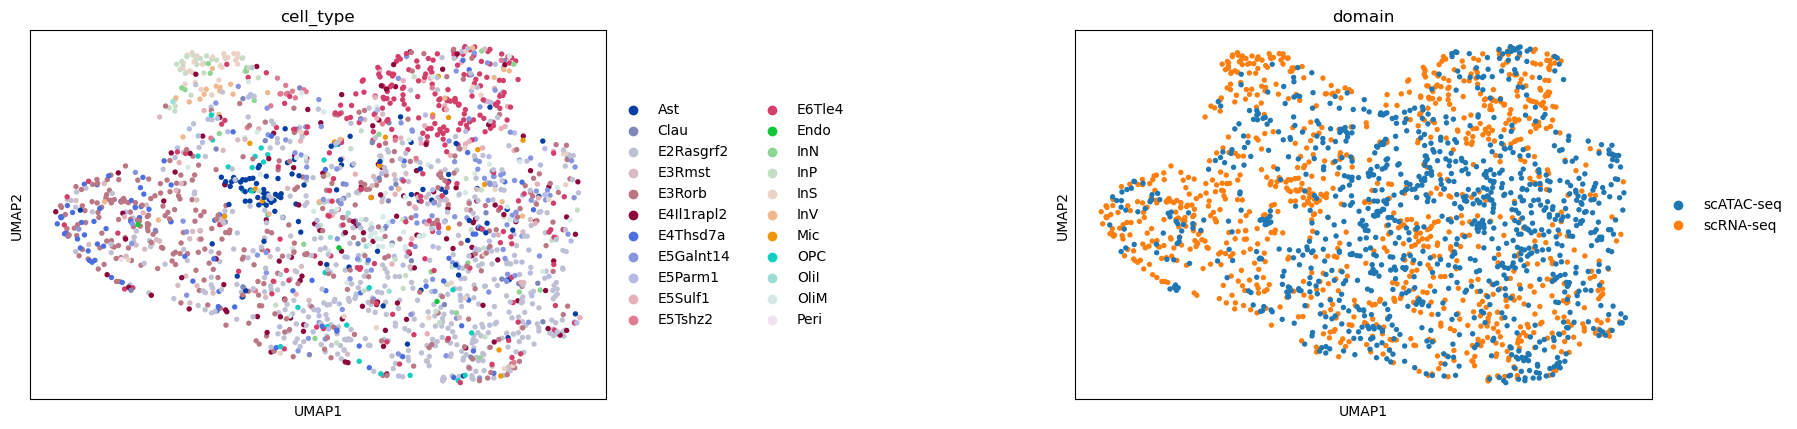

In [23]:
combined = ad.concat([rna, atac])
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")#need embedding here 
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)

In [21]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

In [ ]:
rna.obsm["X_glue"],rna.obsm["X_glue"].shape

In [ ]:
atac.obsm["X_glue"],atac.obsm["X_glue"].shape

In [ ]:
glue.save("glue-seq.dill")

In [ ]:
glue

In [ ]:
!conda env export > jupyter_env.yml